In [31]:
import pandas as pd
import numpy as np

# Đọc file gốc
track_credit_df = pd.read_parquet("data/track_credit.parquet")
tps1 = pd.read_parquet("data/tps_part1.parquet")
tps2 = pd.read_parquet("data/tps_part2.parquet")
tps_df = pd.concat([tps1, tps2])
tps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18765833 entries, 0 to 18765832
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   track_id      int32         
 1   user_id       int32         
 2   date          object        
 3   listen_count  int32         
 4   created_at    datetime64[ns]
 5   updated_at    datetime64[ns]
dtypes: datetime64[ns](2), int32(3), object(1)
memory usage: 644.3+ MB


In [32]:
tps_df['track_id'] = tps_df['track_id'].astype(str)
#tps_df['user_id'] = tps_df['user_id'].astype(str)
tps_df['date'] = pd.to_datetime(tps_df['date']).dt.strftime('%d/%m/%Y')
tps_df['created_at'] = pd.to_datetime(tps_df['created_at']).dt.strftime('%d/%m/%Y %H:%M:%S')
tps_df['updated_at'] = pd.to_datetime(tps_df['updated_at']).dt.strftime('%d/%m/%Y %H:%M:%S')
tps_df

,track_id,user_id,date,listen_count,created_at,updated_at
0,1,-1,02/12/2020,2,03/12/2020 00:22:14,03/12/2020 00:22:14
1,1,14,02/12/2020,9,03/12/2020 00:20:05,03/12/2020 00:20:05
2,1,14,03/12/2020,13,07/12/2020 03:58:40,07/12/2020 03:58:40
3,4,-1,18/05/2020,1,19/05/2020 15:03:50,19/05/2020 15:03:50
4,4,-1,21/05/2020,1,22/05/2020 04:52:53,23/05/2020 02:40:58
...,...,...,...,...,...,...
18765828,22786,1585730,16/11/2024,1,17/11/2024 07:16:26,17/11/2024 07:16:26
18765829,22786,1790029,16/11/2024,1,17/11/2024 07:16:30,17/11/2024 07:16:30
18765830,22786,1883197,16/11/2024,2,17/11/2024 07:16:30,17/11/2024 07:16:30
18765831,22786,1990181,16/11/2024,1,17/11/2024 07:16:33,17/11/2024 07:16:33


In [33]:
#Kiểm tra giá trị còn thiếu theo cột
print(tps_df.isna().sum())

#Kiểm tra giá trị trùng lặp theo dòng
tps_df.duplicated().sum()

track_id        0
user_id         0
date            0
listen_count    0
created_at      0
updated_at      0
dtype: int64


0

In [34]:
tps_df.describe()

,user_id,listen_count
count,1.876583e+07,1.876583e+07
mean,7.212808e+05,1.213218e+00
std,5.381666e+05,1.404523e+01
min,-2.000000e+00,-5.000000e+03
25%,2.580430e+05,1.000000e+00
50%,6.036130e+05,1.000000e+00
75%,1.116863e+06,1.000000e+00
max,1.992047e+06,2.000000e+04


In [35]:
#loại bỏ giá trị âm cho lượt nghe
tps_df = tps_df[tps_df['listen_count'] >= 0]
#khảo sát dữ liệu có lượt nghe lớn
tps_df[tps_df['listen_count']>=20000]

,track_id,user_id,date,listen_count,created_at,updated_at
11227364,6114,-2,06/07/2022,20000,08/07/2022 08:22:51,08/07/2022 08:25:09
15173669,10564,-2,16/04/2023,20000,17/04/2023 09:47:28,17/04/2023 09:47:28


In [43]:
tps_df[tps_df['user_id'] <= 0].sort_values(by=['listen_count'], ascending=False).head(50)

,track_id,user_id,date,listen_count,created_at,updated_at
15173669,10564,-2,16/04/2023,20000,17/04/2023 09:47:28,17/04/2023 09:47:28
11227364,6114,-2,06/07/2022,20000,08/07/2022 08:22:51,08/07/2022 08:25:09
7101840,2654,-2,16/04/2023,18000,17/04/2023 09:47:28,17/04/2023 09:47:28
12161021,6996,-2,31/08/2022,17000,02/09/2022 07:35:16,02/09/2022 15:20:36
12170356,6997,-2,31/08/2022,17000,02/09/2022 07:35:50,02/09/2022 15:20:36
13470174,8007,-2,19/11/2022,14000,22/11/2022 02:28:52,22/11/2022 02:28:52
14412839,9246,-2,29/01/2023,14000,30/01/2023 08:24:37,30/01/2023 08:24:37
13591889,8155,-2,20/11/2022,14000,22/11/2022 02:26:07,22/11/2022 02:26:07
10423083,5413,-2,08/05/2022,13000,09/05/2022 06:55:35,09/05/2022 06:55:35
10957859,5971,-2,25/06/2022,13000,27/06/2022 16:38:42,27/06/2022 16:44:18


user_id = -2 có số lượng nghe rất lớn có thể là một bot hệ thống thực hiện các thử nghiệm, hay một loại tài khoản dùng để thu thập hoặc kiểm tra dữ liệu

lower_bound:  1.0
upper_bound:  1.0


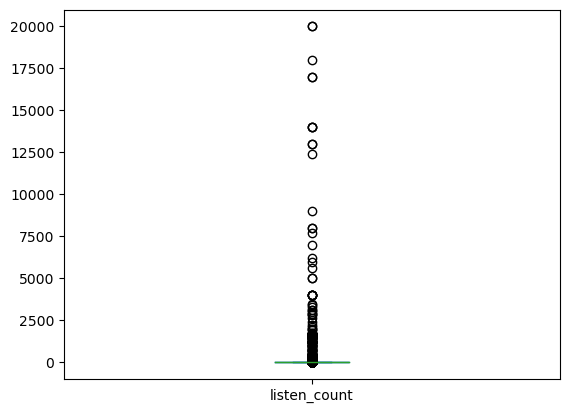

In [50]:
tps_df['listen_count'].plot.box()

# Lọc các outlier theo công thức tính IQR
Q1 = tps_df['listen_count'].quantile(0.25)
Q3 = tps_df['listen_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound: ",lower_bound)
print("upper_bound: ",upper_bound)

Nếu lọc outlier theo công thức Tính IQR thì khi lower_bound = upper_bound = 1, thì sau khi loại bỏ số lượt chỉ còn lại là = 1, dữ liệu không còn ý nghĩa phân tích về hành vi bất thường của một nhóm khách hàng đặc biệt.

In [53]:
# Lọc các outlier theo công thức tính 99th percentile
lower_threshold = tps_df['listen_count'].quantile(0.01)
upper_threshold = tps_df['listen_count'].quantile(0.99)

outlier_df = tps_df[(tps_df['listen_count'] < lower_threshold) | (tps_df['listen_count'] > upper_threshold)]
threshold_df = tps_df[(tps_df['listen_count'] >= lower_threshold) & (tps_df['listen_count'] <= upper_threshold)]

outlier_ratio = round(len(outlier_df)/len(tps_df)*100,2)
print("{} giá trị lớn hơn phân vị 99% IQR chiếm {}% trong tổng {} giá trị".format(len(outlier_df), outlier_ratio, len(tps_df)))

143080 giá trị lớn hơn phân vị 99% IQR chiếm 0.76% trong tổng 18749009 giá trị


In [54]:
threshold_df

,track_id,user_id,date,listen_count,created_at,updated_at
0,1,-1,02/12/2020,2,03/12/2020 00:22:14,03/12/2020 00:22:14
3,4,-1,18/05/2020,1,19/05/2020 15:03:50,19/05/2020 15:03:50
4,4,-1,21/05/2020,1,22/05/2020 04:52:53,23/05/2020 02:40:58
5,4,-1,22/05/2020,2,23/05/2020 02:40:42,27/05/2020 01:53:43
6,4,-1,27/05/2020,1,28/05/2020 07:19:38,28/05/2020 08:06:45
...,...,...,...,...,...,...
18765828,22786,1585730,16/11/2024,1,17/11/2024 07:16:26,17/11/2024 07:16:26
18765829,22786,1790029,16/11/2024,1,17/11/2024 07:16:30,17/11/2024 07:16:30
18765830,22786,1883197,16/11/2024,2,17/11/2024 07:16:30,17/11/2024 07:16:30
18765831,22786,1990181,16/11/2024,1,17/11/2024 07:16:33,17/11/2024 07:16:33
